In [1]:
import spacy
import numpy as np
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt 
import mplcursors

nlp = spacy.load('en_core_web_sm')

In [2]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
df = pd.read_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\divya_youtube.csv", encoding = 'latin-1')
df.head()

In [ ]:
df.shape

In [ ]:
#To replace nan values with dot
for i in df.columns:
    df[i] = df[i].replace(np.nan, ".")

In [ ]:
def cleaner(df1):
    "Extract relevant text from DataFrame using a regex"
    # Regex pattern for only alphanumeric, hyphenated text with 3 or more chars
    pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
    df1['TITLE'] = df['Title'].str.findall(pattern).str.join(' ')
    df1['DESCRIPTION'] = df['Description'].str.findall(pattern).str.join(' ')
    df1['TAGS'] = df['Tags'].str.findall(pattern).str.join(' ')
    
    return df1
      
df_preproc = cleaner(df)

In [ ]:
df_preproc.drop(['Title','Description','Tags'],axis=1,inplace=True)

In [ ]:
df_preproc.to_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Preprocess_data.csv", index=False)

In [ ]:
df_preproc = pd.read_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Preprocess_data.csv")
df_preproc.head()

In [ ]:
nlp_df= pd.DataFrame(columns=["Title_token", "Desc_token", "Tags_token", "Category"])
nlp_df

In [8]:
def is_token_allowed(token):
    '''
        Only allow valid tokens which are not stop words
        and punctuation symbols.
    '''
    if (not token or not token.string.strip() or
        token.is_stop or token.is_punct):
        return False
    return True
    
def preprocess_token(token):
    # Reduce token to its lowercase lemma form
    return token.lemma_.strip().lower()

In [9]:
def get_tokens(main_df,nlp_df):
#     nlp_df= pd.DataFrame(columns=["Title_token", "Desc_token", "Tags", "Category"])
    for i in main_df.index:
        a = {}
        row = df.iloc[i,1:].tolist()
        for j in range(len(row)):
            doc_item = nlp(row[j])
            tokens = [preprocess_token(token) for token in doc_item if is_token_allowed(token)]
#             tokens_nostop = [token for token in tokens if token not in spacy_stopwords]   #No neeeddddd
            a.update({nlp_df.columns[j]:str(tokens).strip("[]")})
#             break
#             print(tokens)
#         print(a)
        nlp_df = nlp_df.append(a, ignore_index=True)
#         break
    return nlp_df


In [ ]:
nlp_df =get_tokens(df_preproc, nlp_df)

In [ ]:
nlp_df.head()

In [ ]:
nlp_df.shape

In [ ]:
nlp_df.Category = df_preproc.Category

In [ ]:
nlp_df.to_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Tokens_data1.csv", index=False)

## Word Freq

In [7]:
nlp_data = pd.read_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Tokens_data2.csv")
nlp_data.head()

,Title_token,Desc_token,Tags_token,Category
0,"'bho', 'shambo', 'shiva', 'shambo', 'sharanya'...","'bho', 'shambo', 'shiva', 'shambo', 'sharanya'...","'bho', 'shambo', 'bho', 'shambho', 'lord', 'sh...",Music
1,"'sri', 'krishna', 'ashtottara', 'satanamavalli...","'sri', 'krishna', 'ashtottara', 'satanamavalli...","'krishna', 'ashtottara', 'krishna', 'ashtottar...",Music
2,"'aigiri', 'nandini', 'mahishasura', 'mardini',...","'aigiri', 'nandini', 'mahishasura', 'mardini',...","'aigiri', 'nandini', 'mahishasura', 'mardini',...",Music
3,"'shree', 'ram', 'ashtottara', 'shatabidhana', ...","'sri', 'rama', 'ashtottara', 'shatabidhana', '...","'ram', 'mandir', 'ayodhya', 'ram', 'mandir', '...",Music
4,"'shiva', 'drum', 'music', 'namah', 'shivaya', ...","'music', 'sundar', 'headphones', 'recommend', ...","'namah', 'shivaya', 'shiva', 'mantra', 'namah'...",Music


In [8]:
#To replace nan values with dot
for i in nlp_data.columns:
    nlp_data[i] = nlp_data[i].replace(np.nan, ".")

In [9]:
#Removing numbers
nlp_data['Title_token'] = nlp_data['Title_token'].str.replace('\d+', '')
nlp_data['Desc_token'] = nlp_data['Desc_token'].str.replace('\d+', '')
nlp_data['Tags_token'] = nlp_data['Tags_token'].str.replace('\d+', '')

In [10]:
#Removing links(http,www,com,youtube etc)
nlp_data['Desc_token'] = nlp_data['Desc_token'].str.replace('http\S+|www.\S+|html\S+|-\S+|com\S+|youtube\S+|https\S+','', case=False)
nlp_data['Tags_token'] = nlp_data['Desc_token'].str.replace('http\S+|www.\S+|html\S+|-\S+|com\S+|youtube\S+|https|S+','', case=False)

In [6]:
categories = nlp_data.Category.unique()
categories

In [ ]:
#NOT USED. ERRORS FACED. WRONG OUTPUT

# def word_counter(text, cat):
#     docs = nlp(str(text))
#     tokens = [preprocess_token(token) for token in docs if is_token_allowed(token)]    
#     print(tokens)
#     word_counts = Counter(tokens)
# #     print(word_counts)
#     counts_df = pd.DataFrame.from_dict(word_counts, orient="index").reset_index()
#     counts_df = counts_df.rename(columns={"index":"Word",0:"Count"}).sort_values(by="Count", ascending=False)
#     counts_df["Category"] = cat
# #     print(counts_df.head())
#     plot_unigram(counts_df[:10], cat)
# #     top5 = word_counts.most_common(5)
#     return counts_df.iloc[:10,]

In [10]:
def word_counter(text, cat, main_counts):
    freq = pd.Series(' '.join(text).split())
    freq=freq.str.cat(sep=" ")
    docs = nlp(freq)
    tokens = [preprocess_token(token) for token in docs if is_token_allowed(token)]    
    word_counts = Counter(tokens)

    counts_df = pd.DataFrame.from_dict(word_counts, orient="index").reset_index()
    counts_df = counts_df.rename(columns={"index":"Word",0:"Count"}).sort_values(by="Count", ascending=False)
    counts_df["Category"] = cat

    main_counts = main_counts.merge(counts_df, on="Word", how="outer")
    main_counts.fillna(0, inplace=True)
    main_counts["Count"] = main_counts['Count_x'] + main_counts['Count_y']
    main_counts["Category"] = cat
    main_counts.drop(["Count_x", "Count_y", "Category_x", "Category_y"], axis=1, inplace=True)
    return main_counts

#     top5 = word_counts.most_common(5)
#     return counts_df.iloc[:10,]

In [11]:
# word_counter(nlp_data[nlp_data.Category=="Music"].Title_token, "Music")

In [ ]:
# # title_df = pd.DataFrame(columns=["Category","Word", "Count"])
# for i in categories:
#     print(type(i))
#     title_df = pd.DataFrame(title_freq[i],columns=["Word", "Count"])
#     print(title_df)
#     plot_unigram(title_df,i)
#     break

In [35]:
title_freq = pd.DataFrame(columns=["Category","Word", "Count"])
for category in categories:
    midman_df = pd.DataFrame(columns=["Category","Word", "Count"])
    df_cat = nlp_data[nlp_data.Category==category] 
#     freq = pd.Series(' '.join(df_cat['Title_token']).split()).value_counts()[:5]
#     print(freq)
    title_freq = title_freq.append(word_counter(df_cat.Title_token, category,midman_df), ignore_index=True)
#     input("Enter any key to continue")

In [36]:
len(title_freq.Category.unique())

15

In [37]:
title_freq.to_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Word_counts\\Title_counts.csv", index=False)

In [21]:
len(nlp_data[nlp_data.Category=="Music"].Desc_token)

5769

In [13]:
desc_freq= pd.DataFrame(columns=["Category","Word", "Count"])
for category in categories:
    midman_df = pd.DataFrame(columns=["Category","Word", "Count"])
    df_cat = nlp_data[nlp_data.Category==category]
    for i in range(0,df_cat.shape[0],200):
        if (i+200)<df_cat.shape[0]:l=i+200
        else: l = df_cat.shape[0]+1            
        midman_df = word_counter(df_cat.Desc_token[i:l], category, midman_df)
#         break
    midman_df.sort_values(by='Count', ascending=False, inplace=True)
#     plot_unigram(midman_df[:20], category)
    desc_freq = desc_freq.append(midman_df, ignore_index=True)
#     desc_freq.update({category: word_counter(df_cat.Desc_token)})
#     input("Enter any key to continue")

In [14]:
len(desc_freq.Category.unique())

15

In [15]:
desc_freq.to_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Word_counts\\Desc_counts.csv", index=False)

In [30]:
tags_freq=pd.DataFrame(columns=["Category","Word", "Count"])

for category in categories:
    midman_df = pd.DataFrame(columns=["Category","Word", "Count"])
    df_cat = nlp_data[nlp_data.Category==category] 
    
    for i in range(0,df_cat.shape[0],200):
        if (i+200)<df_cat.shape[0]:l=i+200
        else: l = df_cat.shape[0]+1            
        midman_df = word_counter(df_cat.Tags_token[i:l], category, midman_df)
#         break
    midman_df.sort_values(by='Count', ascending=False, inplace=True)
#     plot_unigram(midman_df[:20], category)
    tags_freq = tags_freq.append(midman_df, ignore_index=True)

#     tags_freq = tags_freq.append(word_counter(df_cat.Tags_token, category), ignore_index=True)
#     tags_freq.update({category: word_counter(df_cat.Tags_token)})
#     input("Enter any key to continue")

In [31]:
len(tags_freq.Category.unique())

15

In [32]:
tags_freq.to_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Word_counts\\Tags_counts.csv", index=False)

### Unigrams

In [2]:
def plot_unigram(cat_df, title):
    #Barplot of most freq words
    sns.set(rc={'figure.figsize':(13,10)})
    g = sns.barplot(x="Word", y="Count", data=cat_df)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    g.set_title(title, fontsize=20)
    mplcursors.cursor(hover=True)
    plt.show()

In [4]:
title_freq = pd.read_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Word_counts\\Title_counts.csv")

In [4]:
categories = title_freq.Category.unique()
categories

array(['Music', 'Entertainment', 'Automobiles', 'Education',
       'Film_and_Animation', 'Food', 'News_Politics', 'Fashion', 'Gaming',
       'Videoblogging', 'Travel', 'Sports', 'Sciene&Technology',
       'Religion', 'Pets_Animals'], dtype=object)

In [3]:
title_freq.shape

(47391, 3)

In [18]:
# for cat in categories:
#     print(title_freq[title_freq.Category==cat])

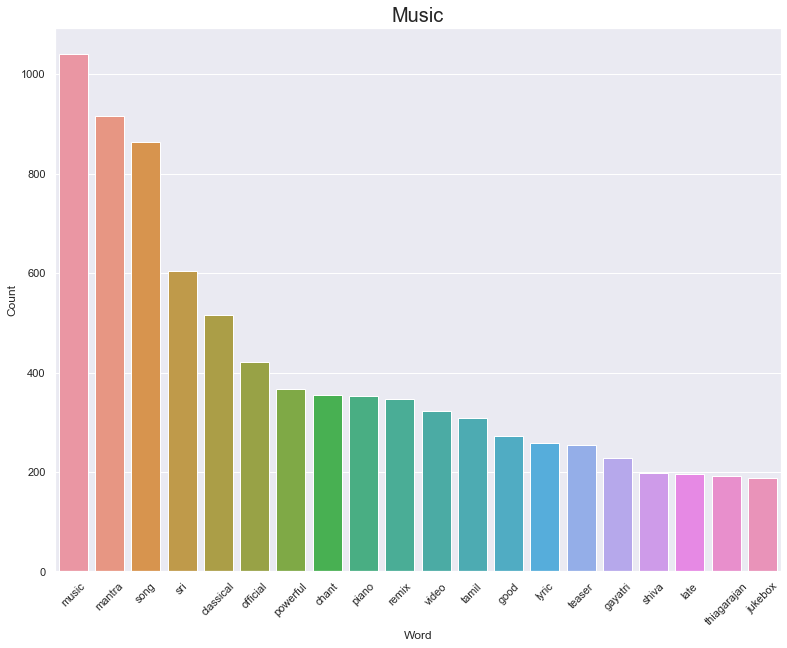

Enter any key to continue


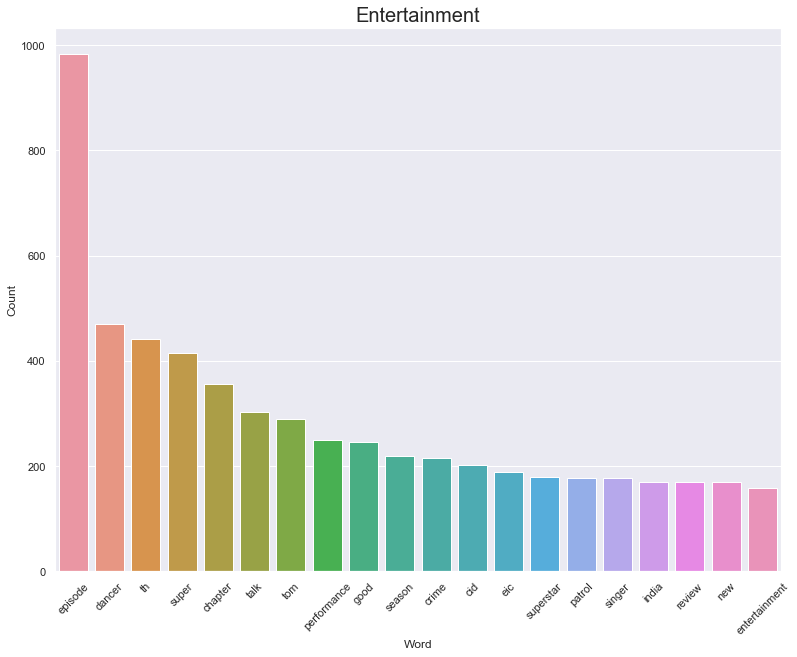

Enter any key to continue


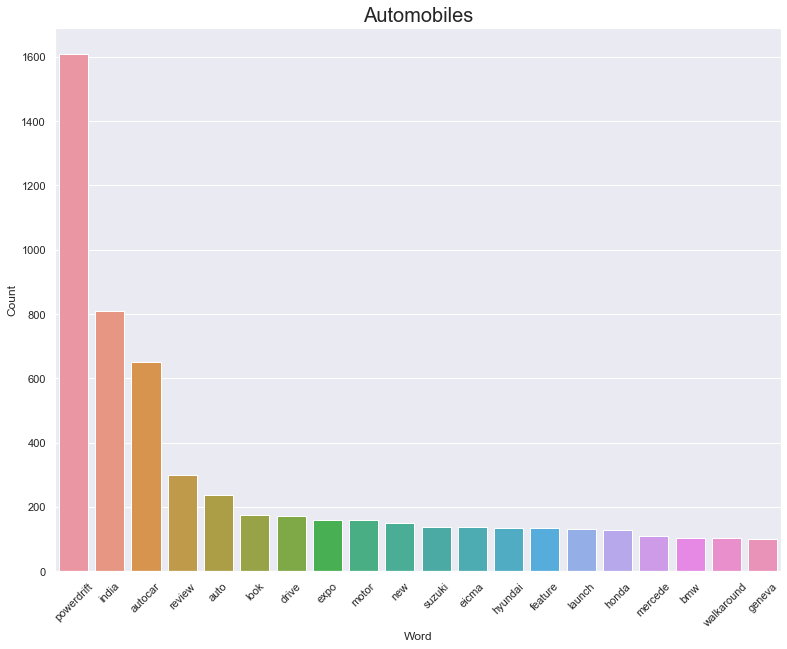

Enter any key to continue


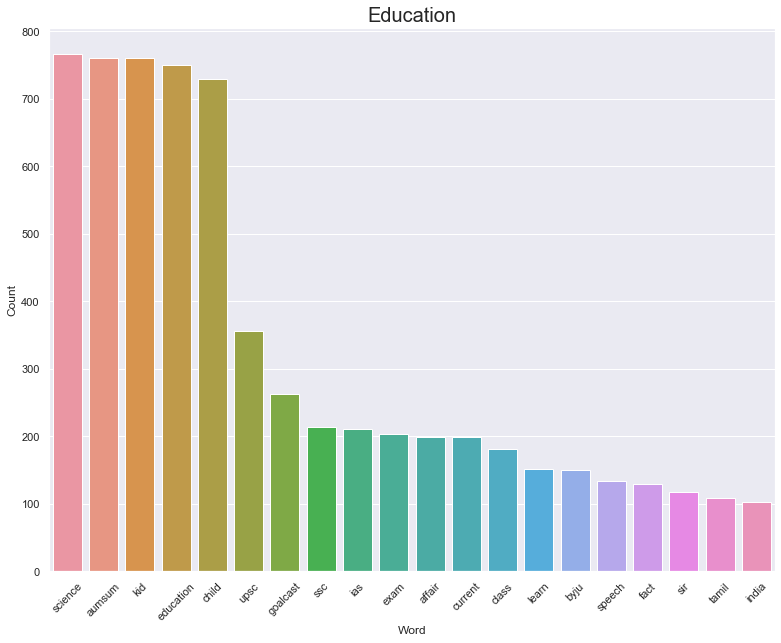

Enter any key to continue


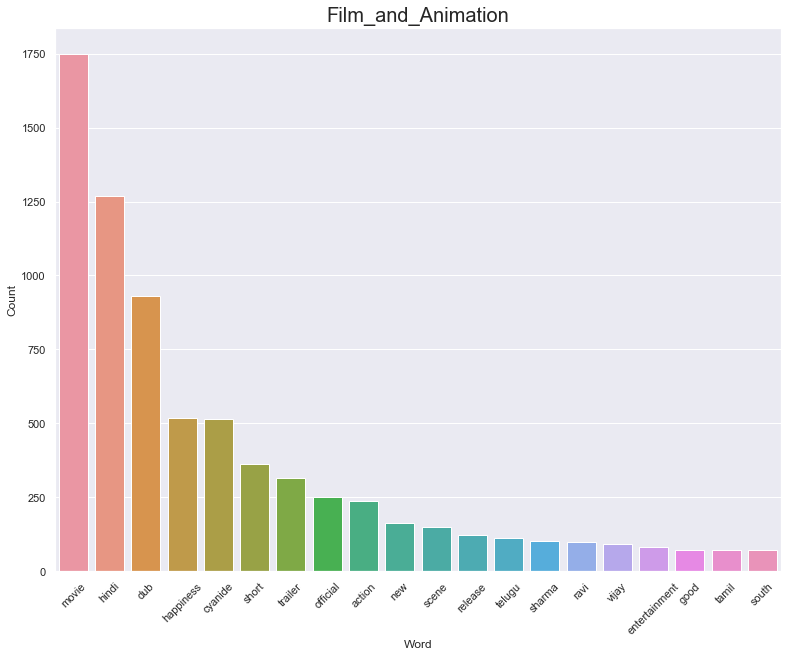

Enter any key to continue


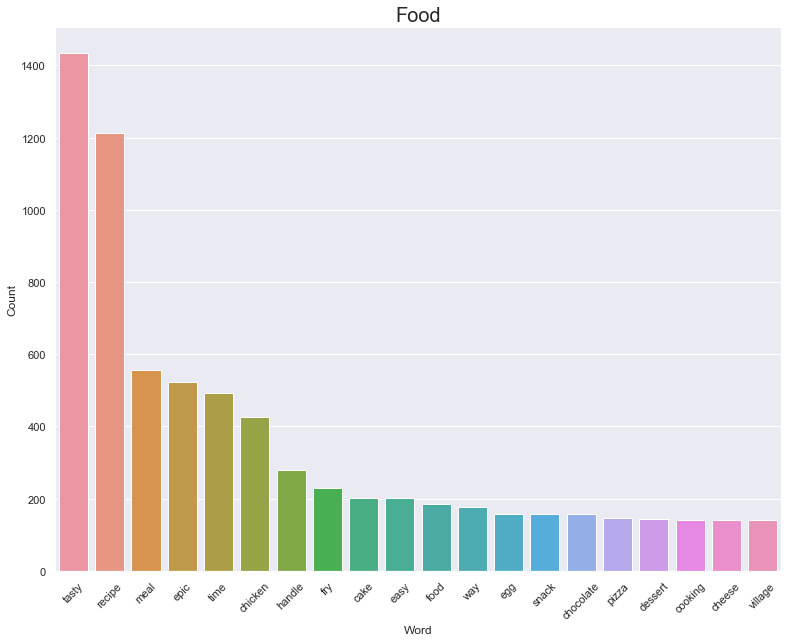

Enter any key to continue


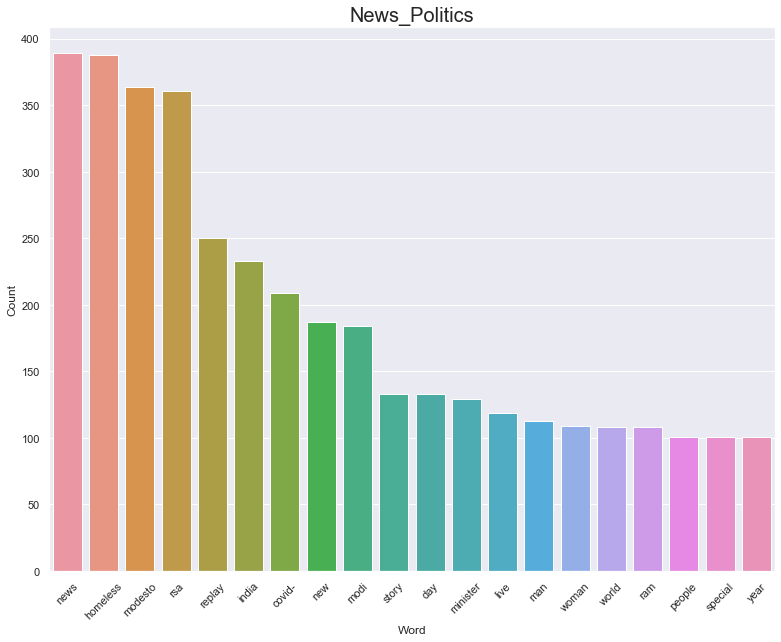

Enter any key to continue


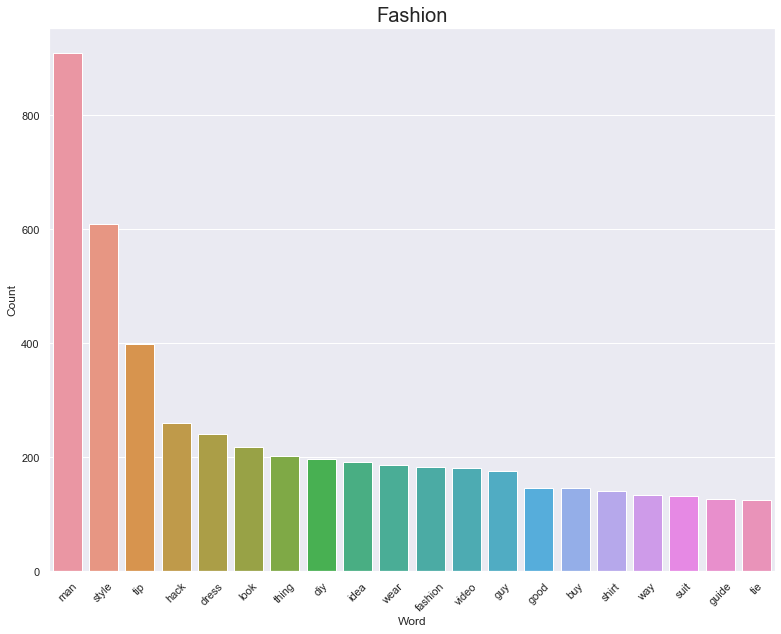

Enter any key to continue


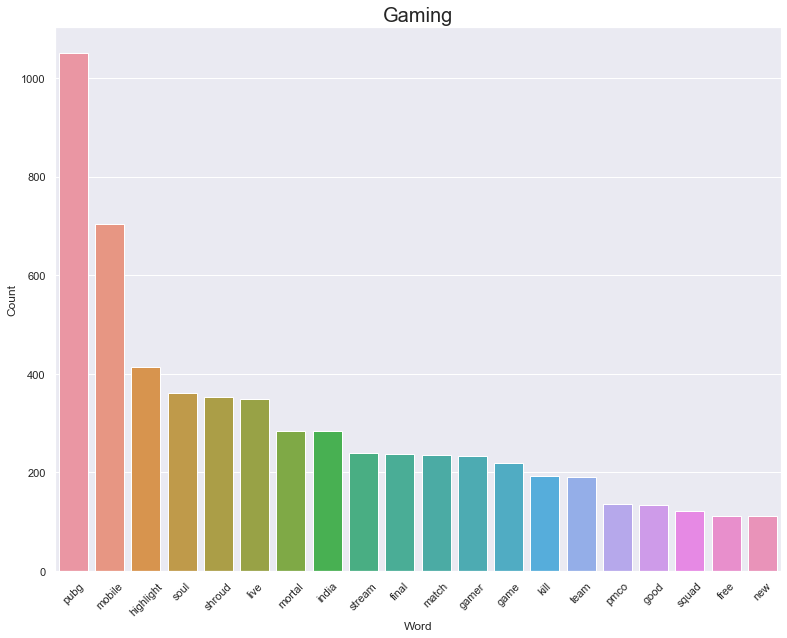

Enter any key to continue


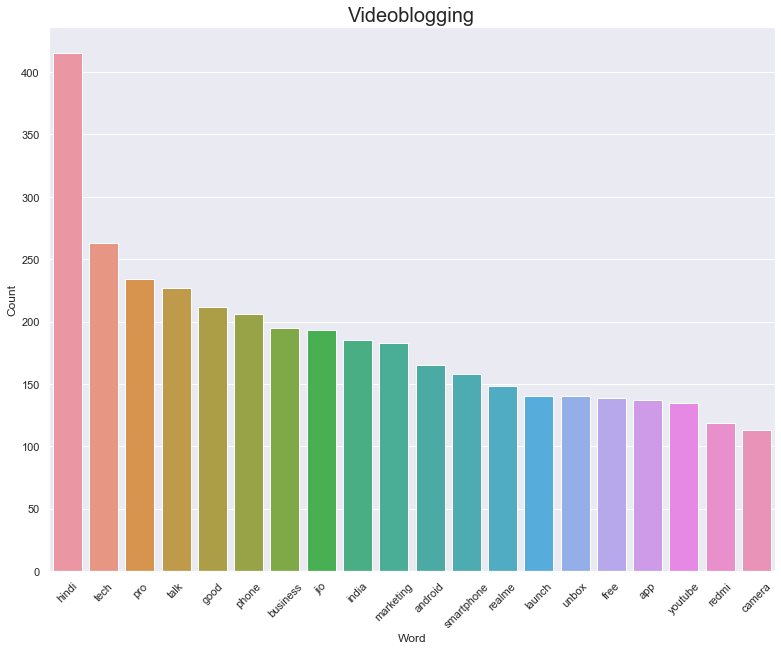

Enter any key to continue


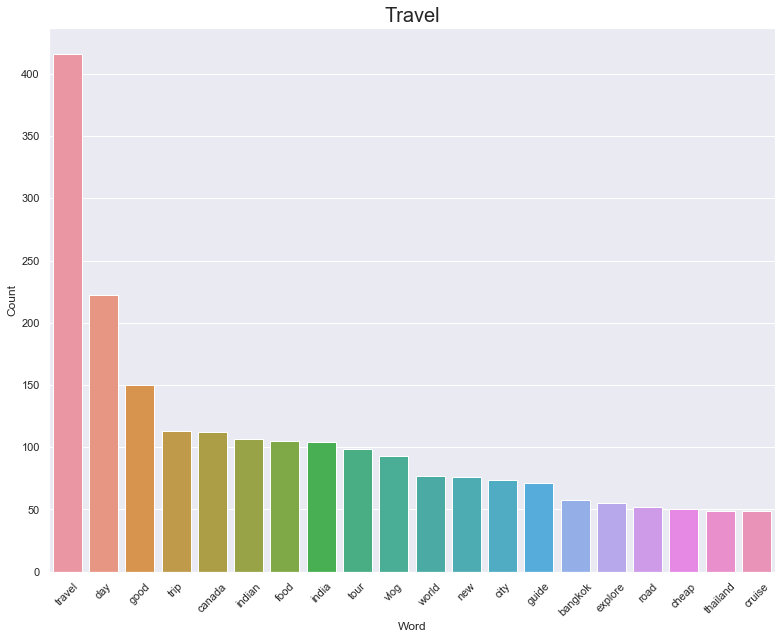

Enter any key to continue


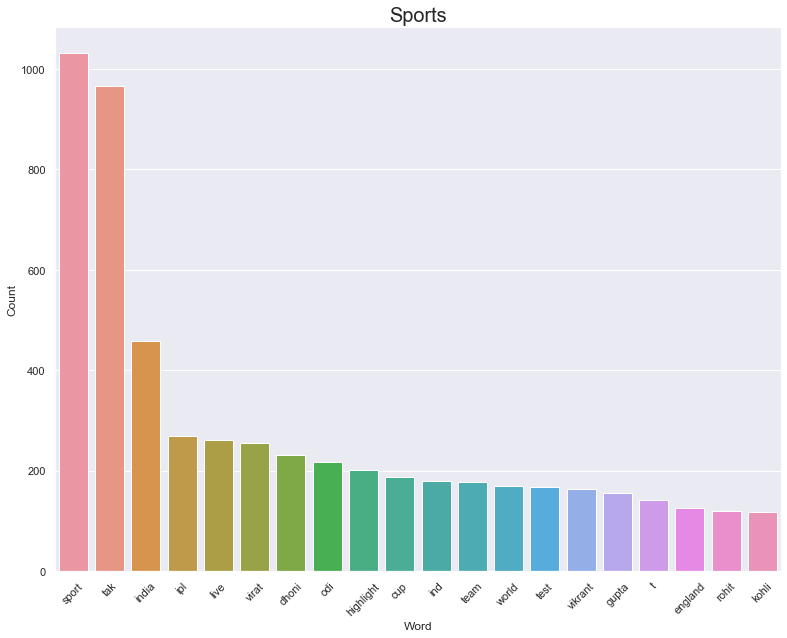

Enter any key to continue


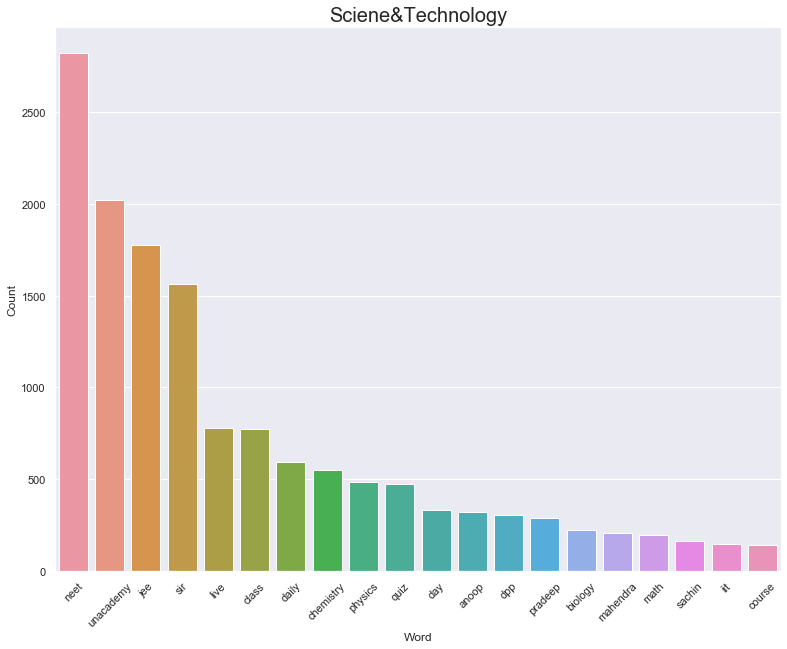

Enter any key to continue


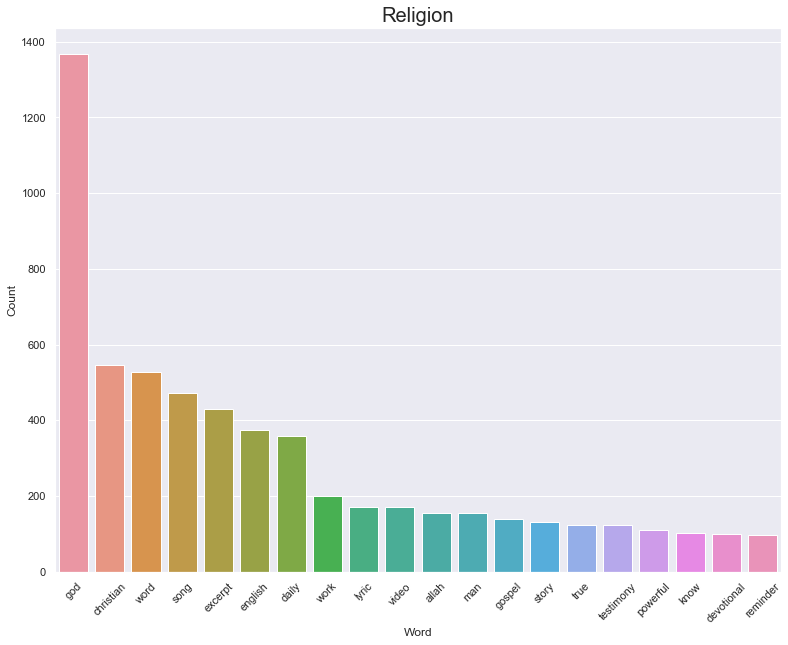

Enter any key to continue


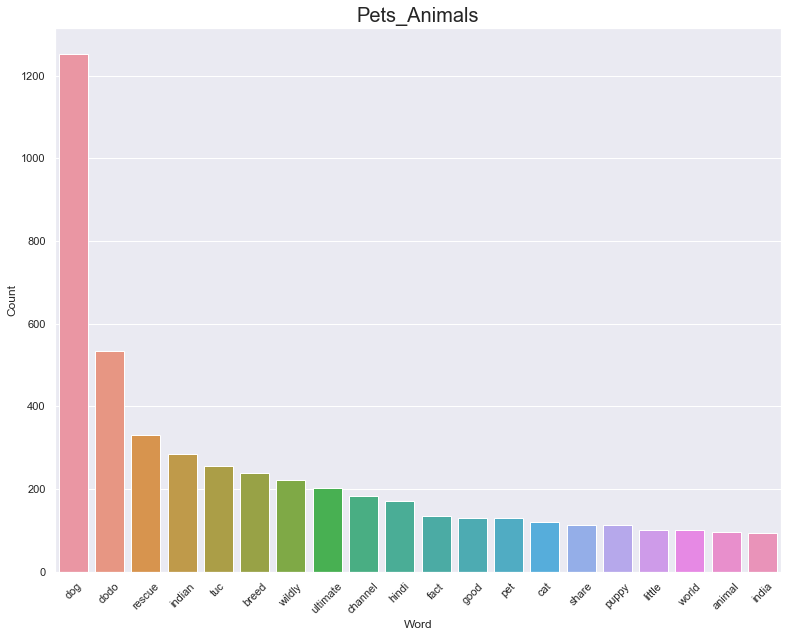

Enter any key to continue


In [25]:
for cat in categories:
    plot_unigram(title_freq[title_freq.Category==cat].iloc[:20], cat)
    input("Enter any key to continue")

In [26]:
desc_freq = pd.read_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Word_counts\\Desc_counts.csv")

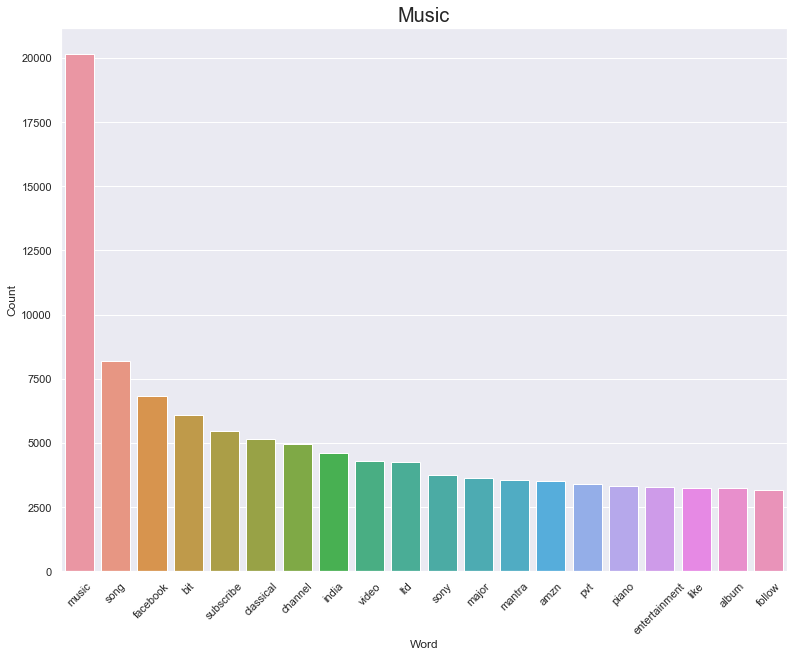

Enter any key to continue


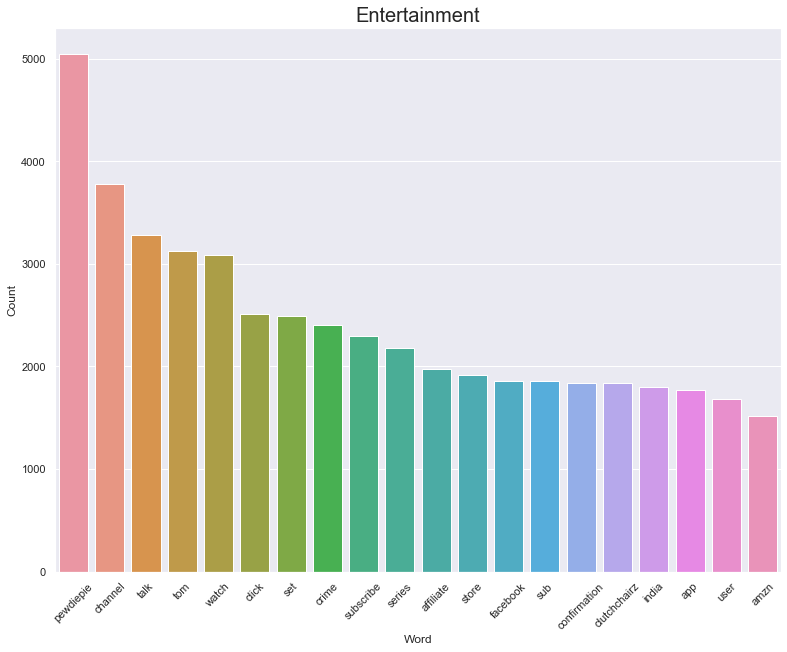

Enter any key to continue


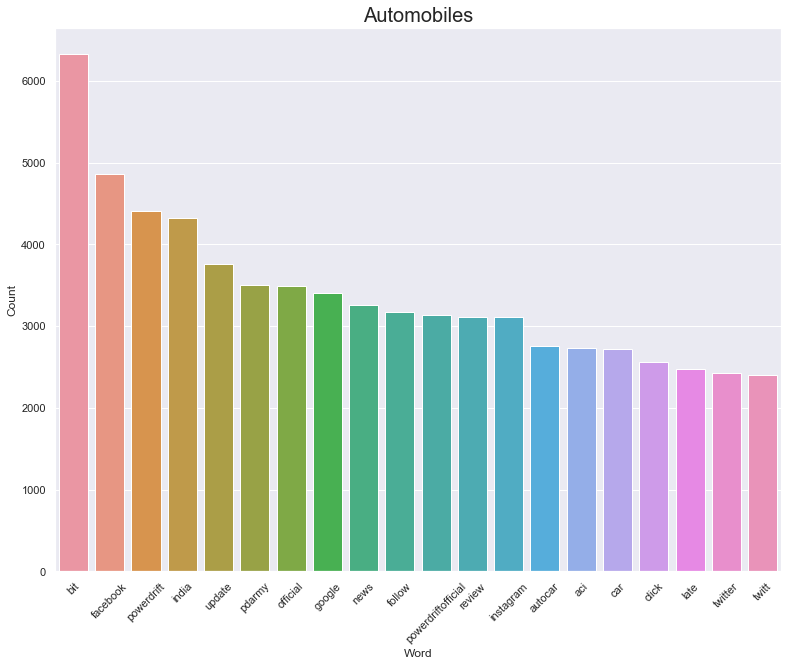

Enter any key to continue


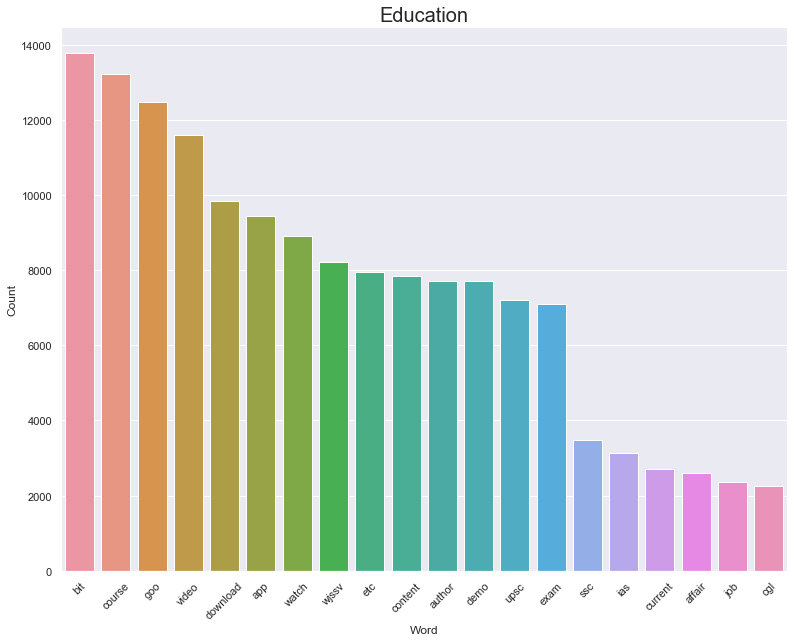

Enter any key to continue


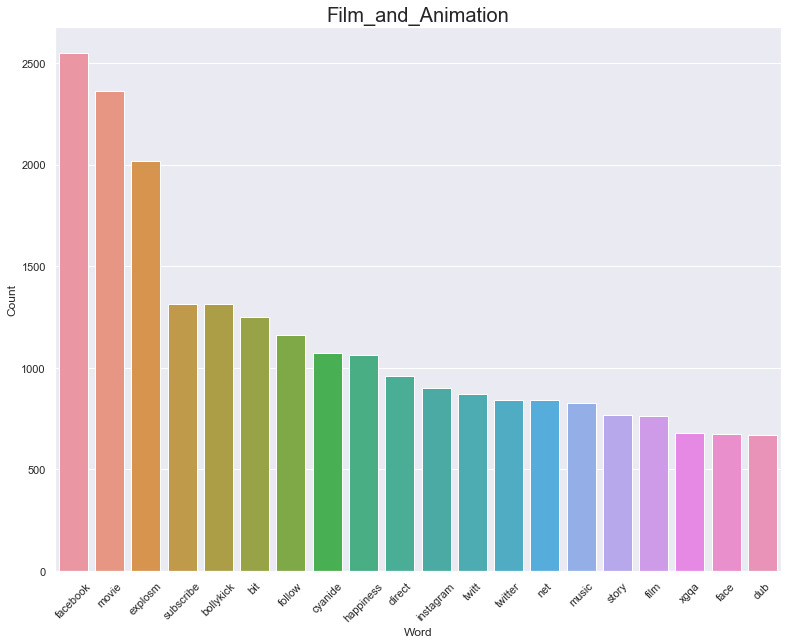

Enter any key to continue


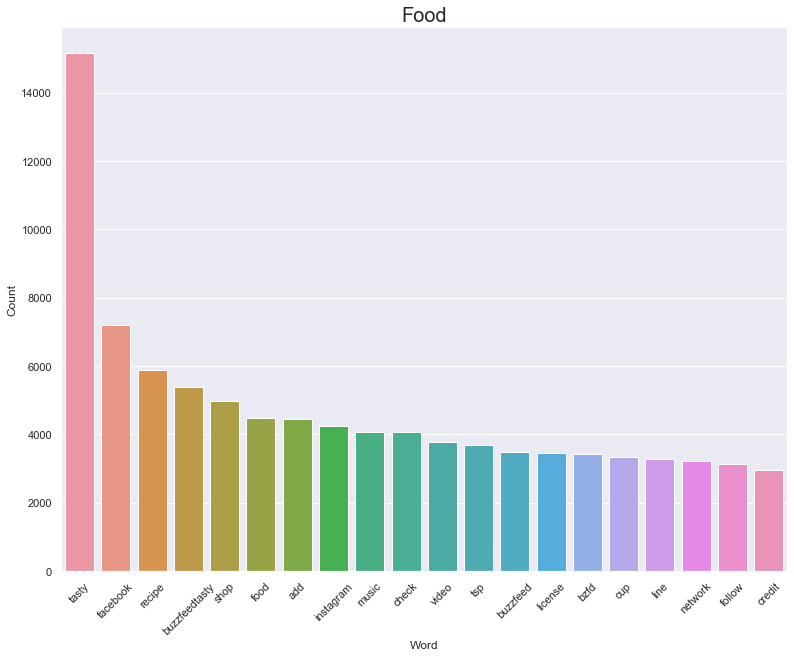

Enter any key to continue


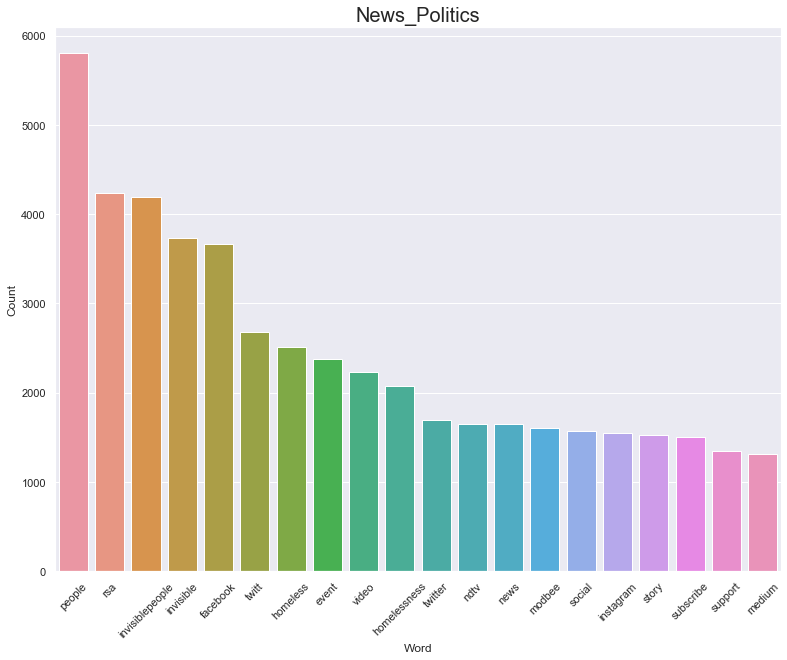

Enter any key to continue


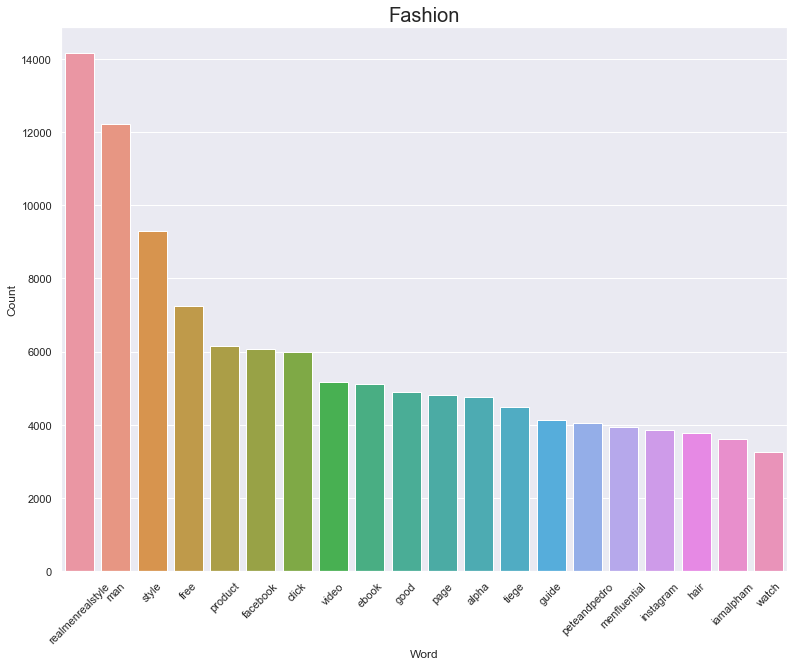

Enter any key to continue


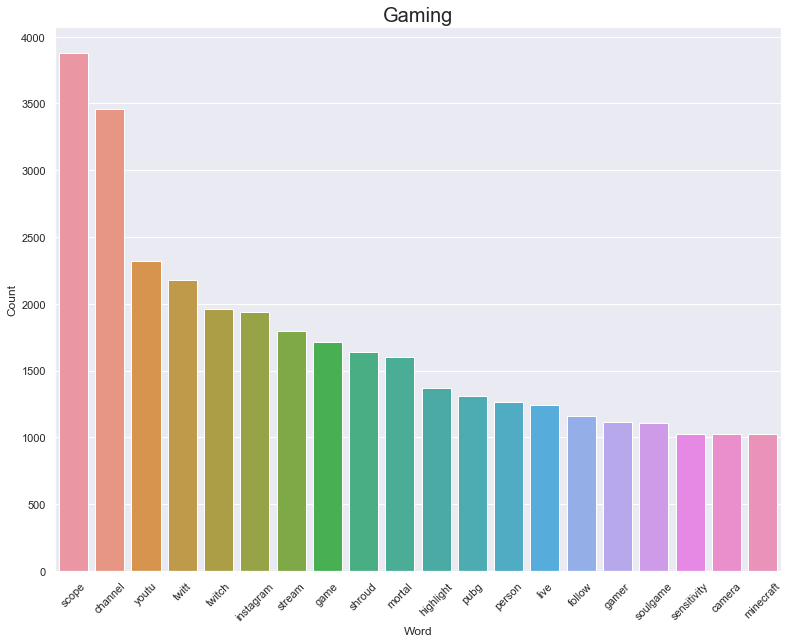

Enter any key to continue


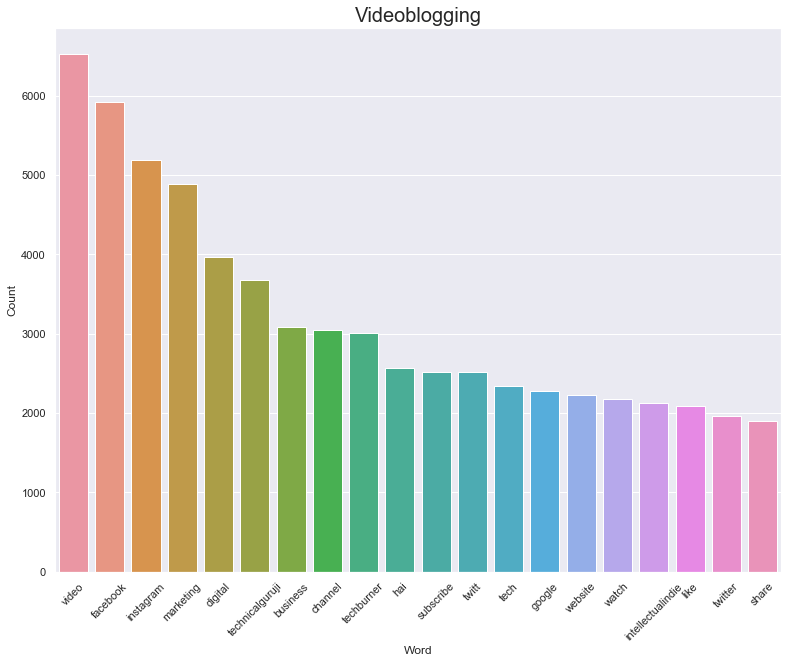

Enter any key to continue


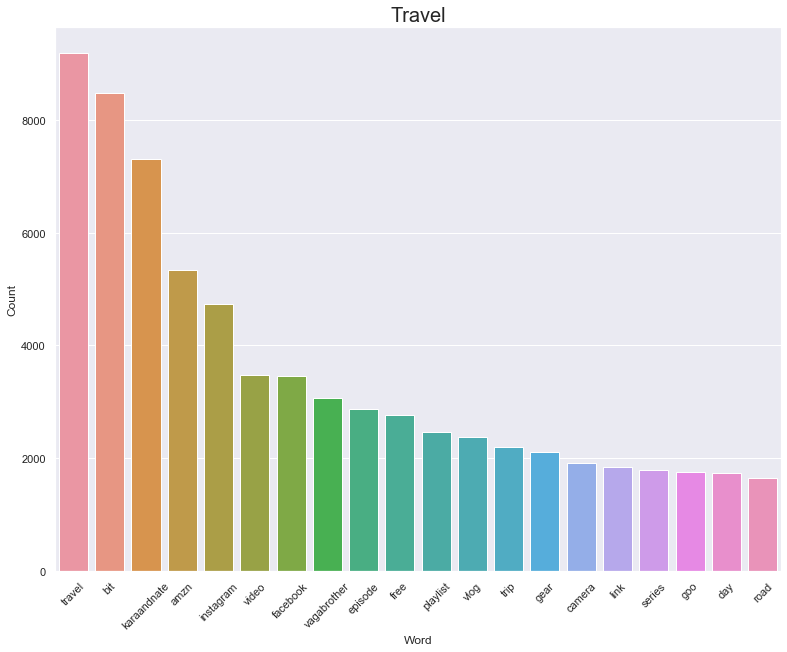

Enter any key to continue


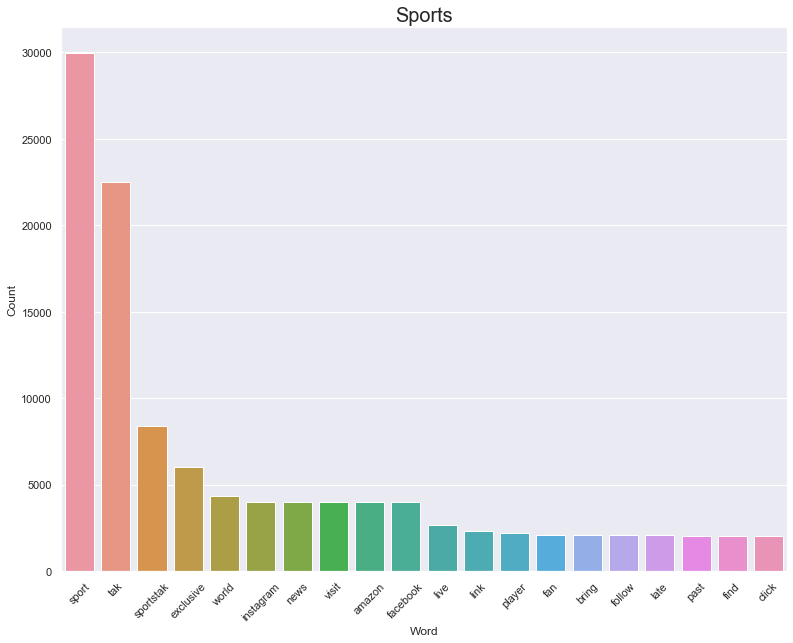

Enter any key to continue


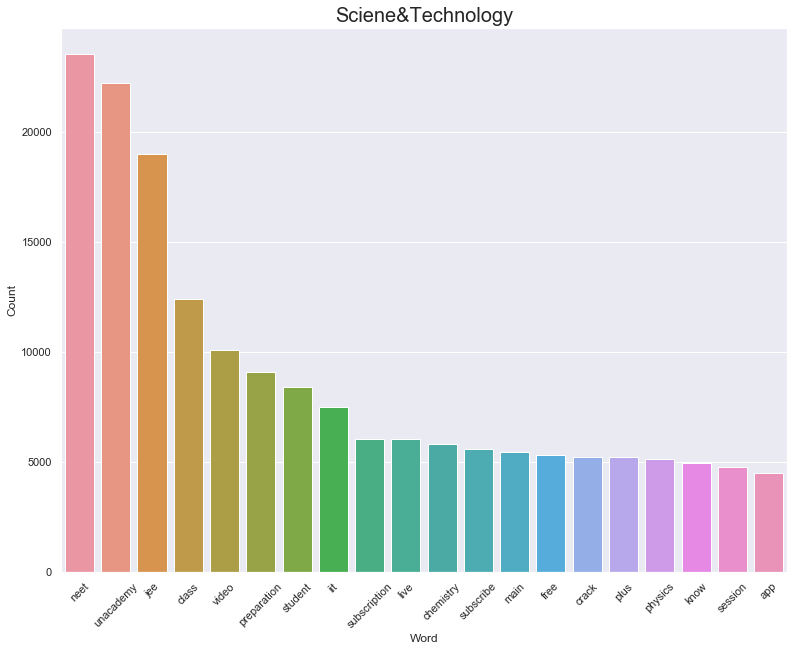

Enter any key to continue


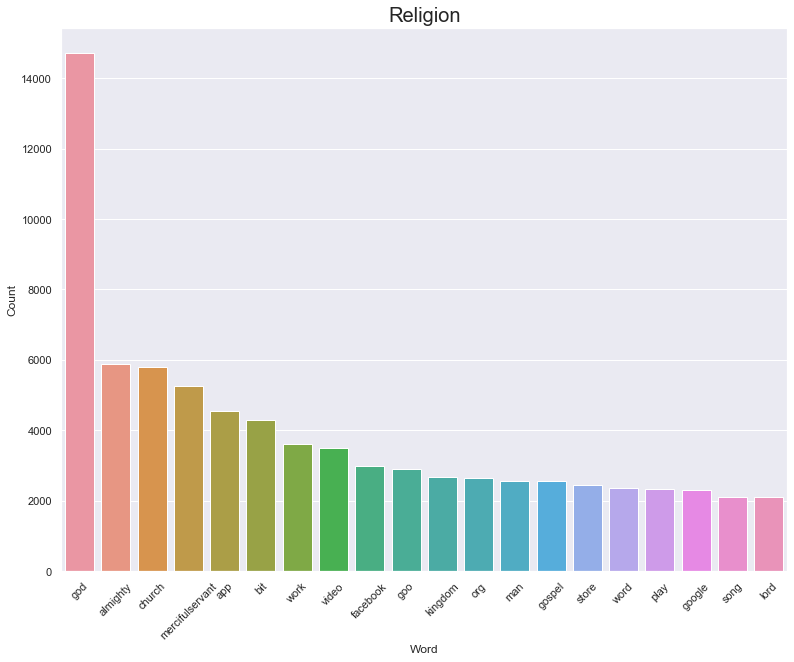

Enter any key to continue


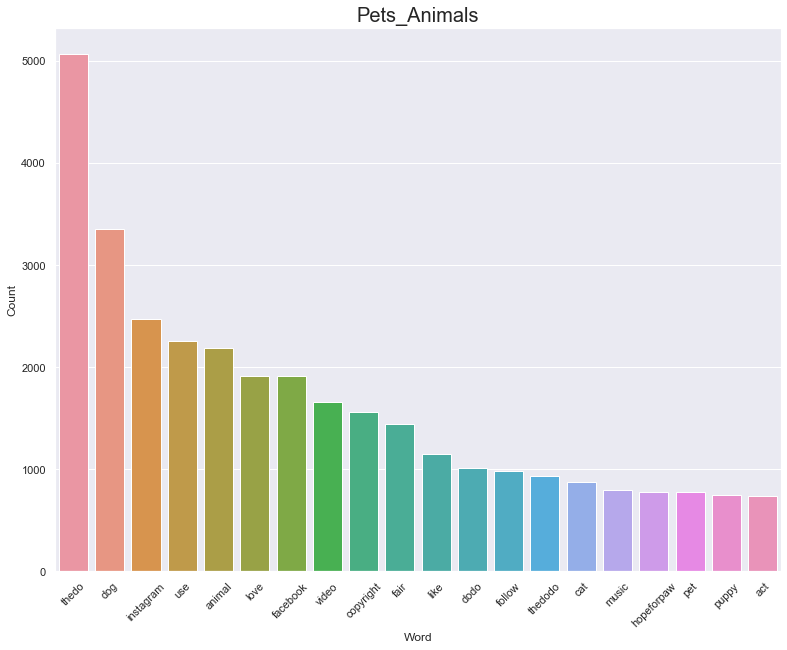

Enter any key to continue


In [27]:
for cat in categories:
    plot_unigram(desc_freq[desc_freq.Category==cat].iloc[:20], cat)
    input("Enter any key to continue")

In [3]:
tags_freq = pd.read_csv("C:\\Users\\jyoth\\Desktop\\Sem 3\\Youtube MOM proj\\Data\\Word_counts\\Tags_counts.csv")

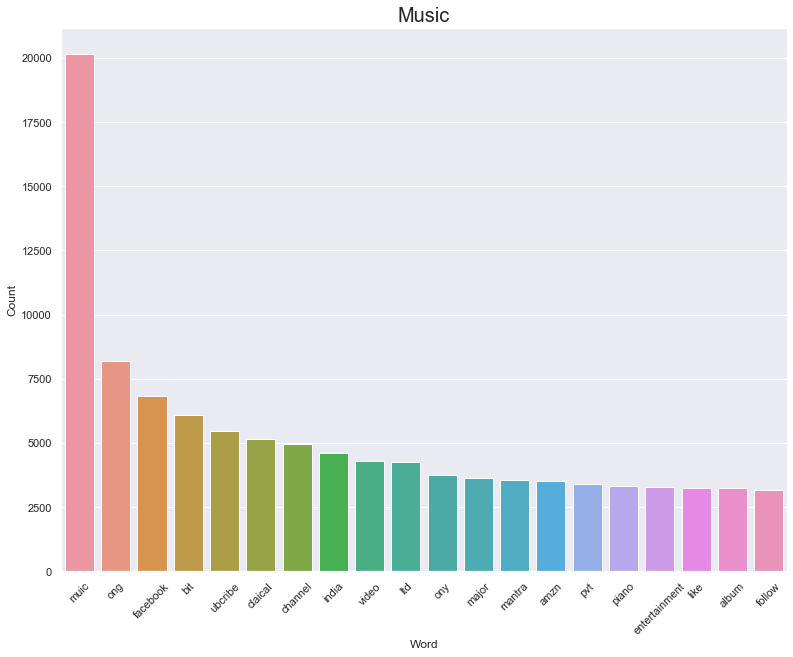

Enter any key to continue


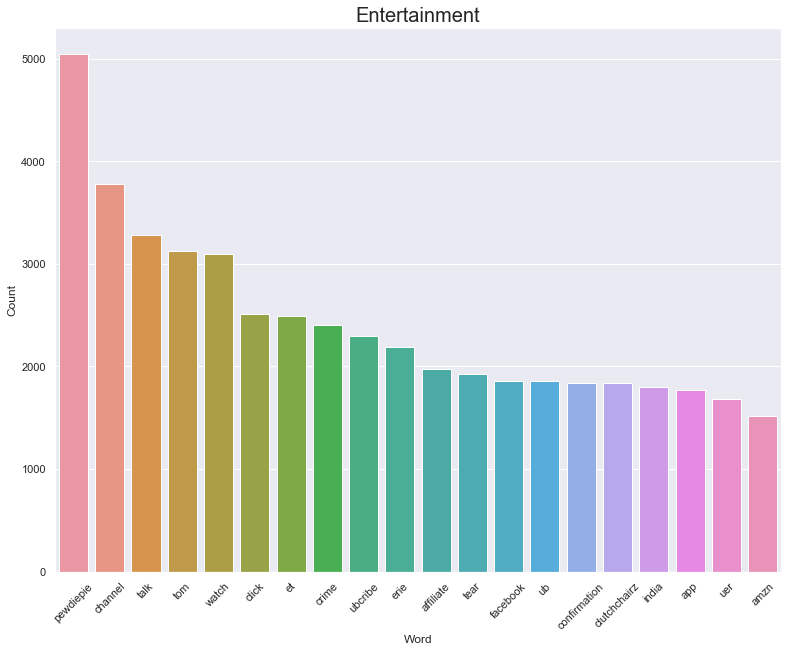

Enter any key to continue


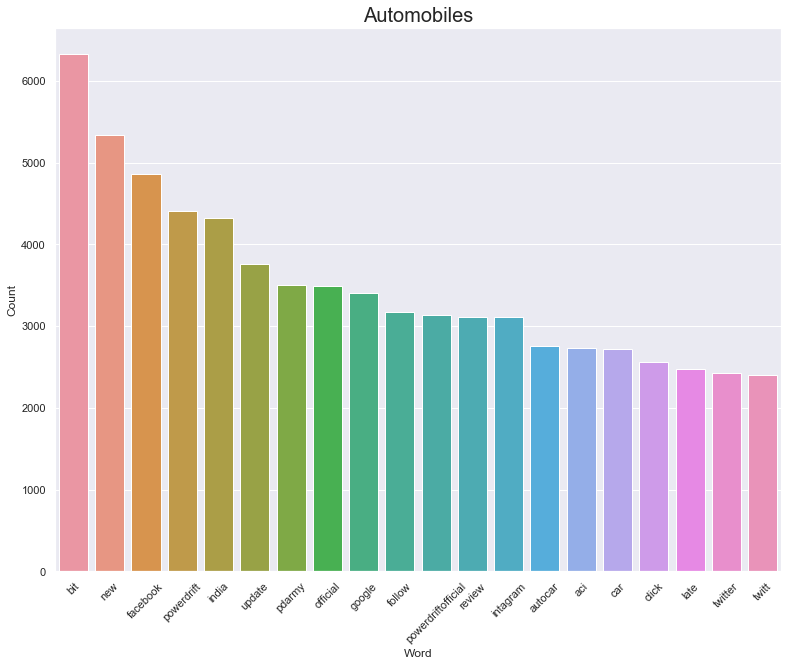

Enter any key to continue


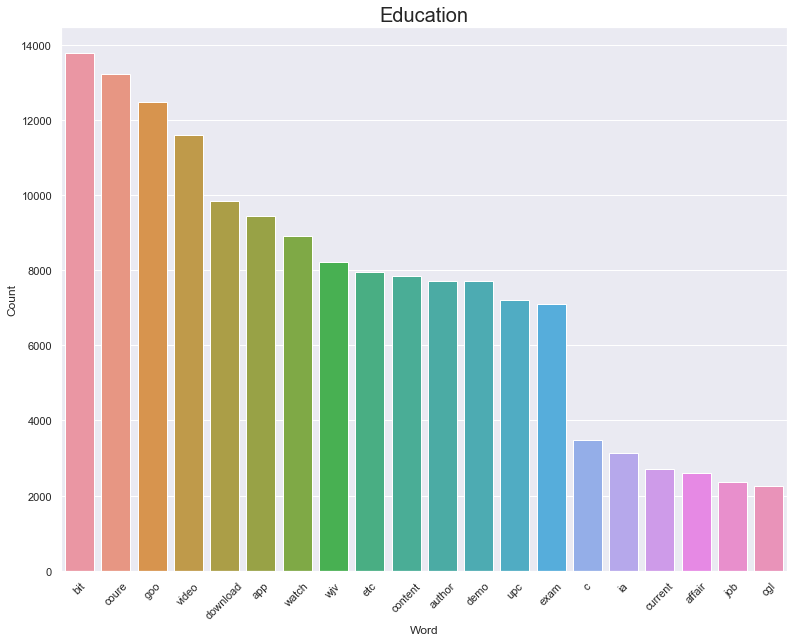

Enter any key to continue


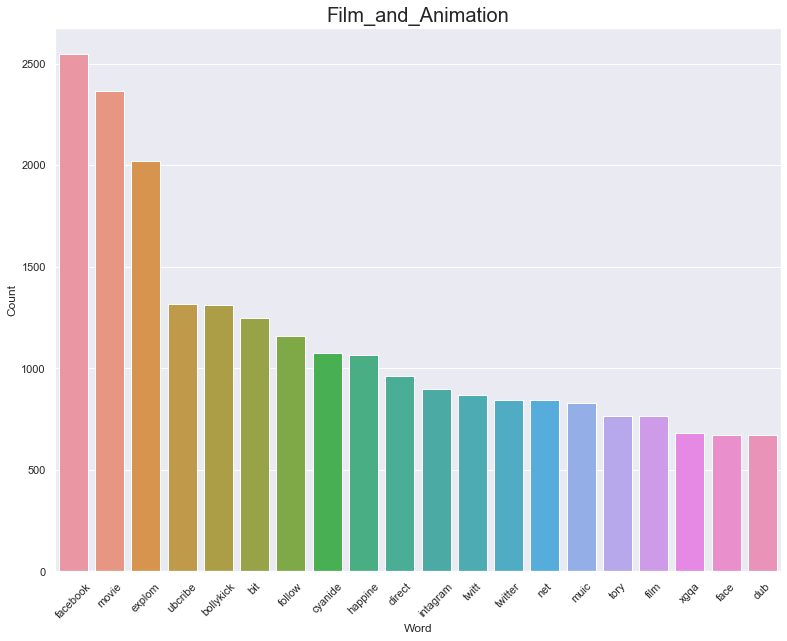

Enter any key to continue


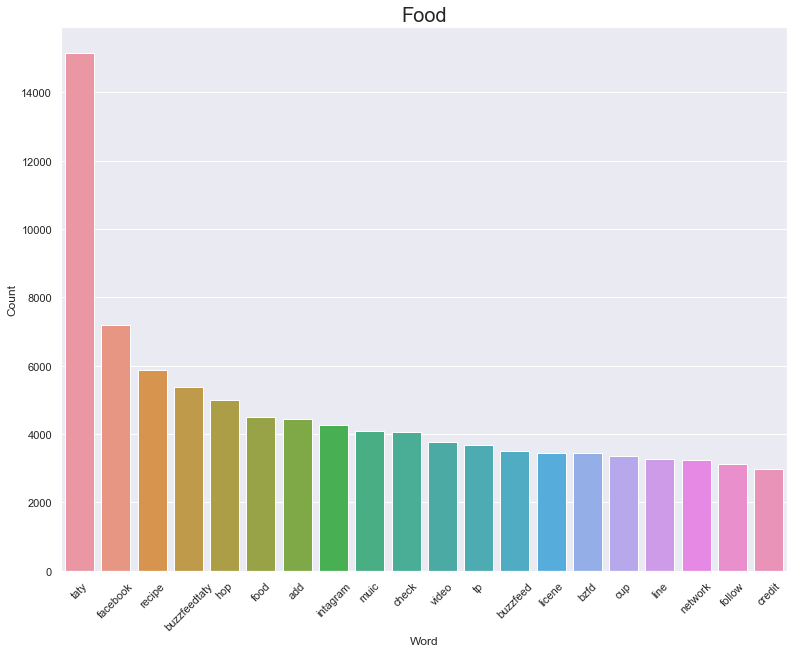

Enter any key to continue


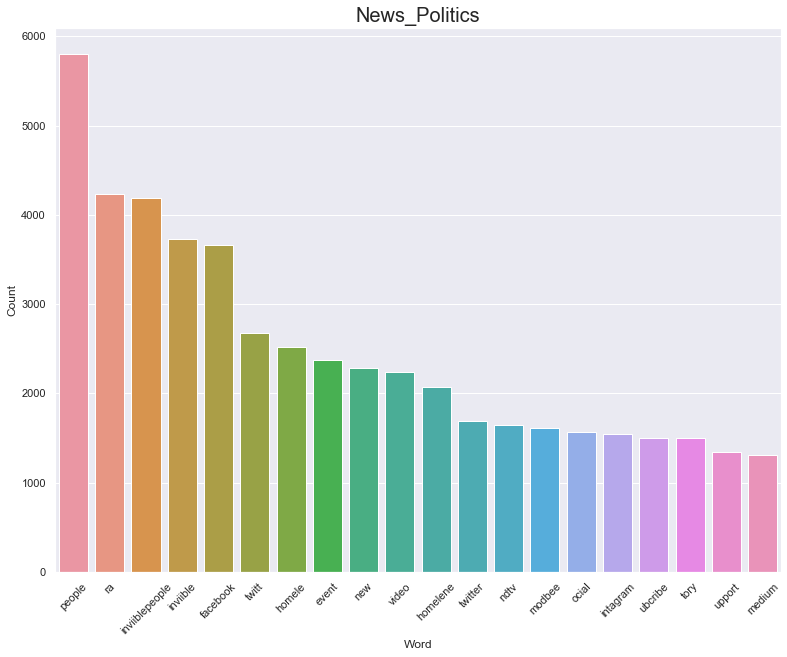

Enter any key to continue


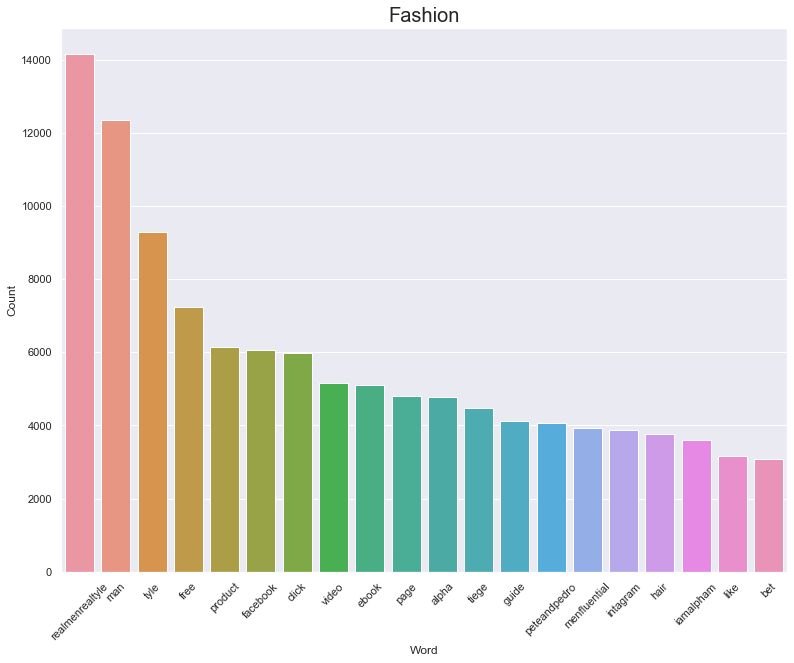

Enter any key to continue


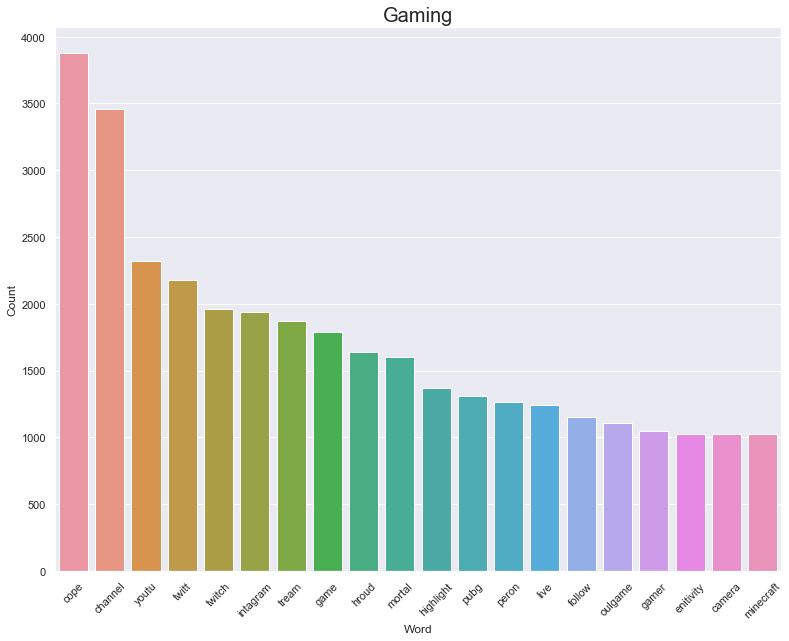

Enter any key to continue


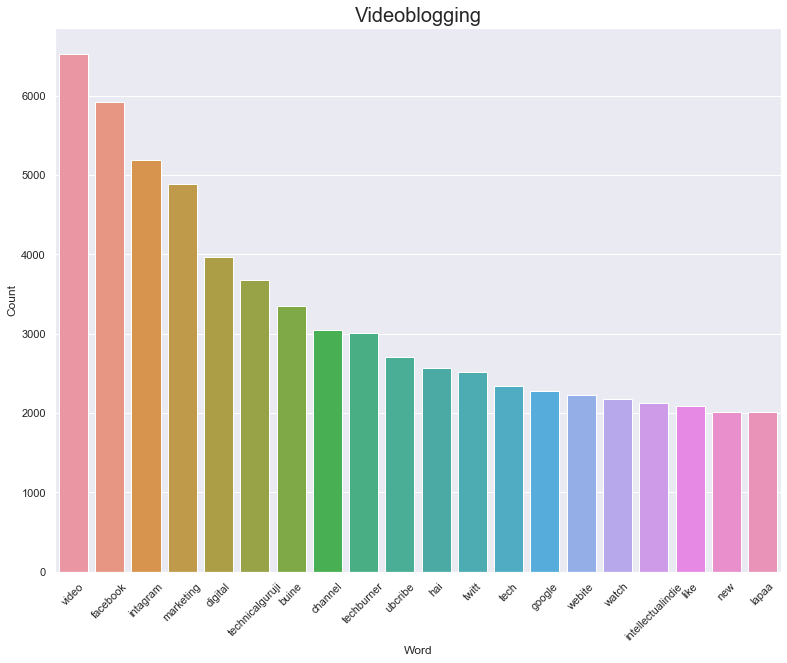

Enter any key to continue


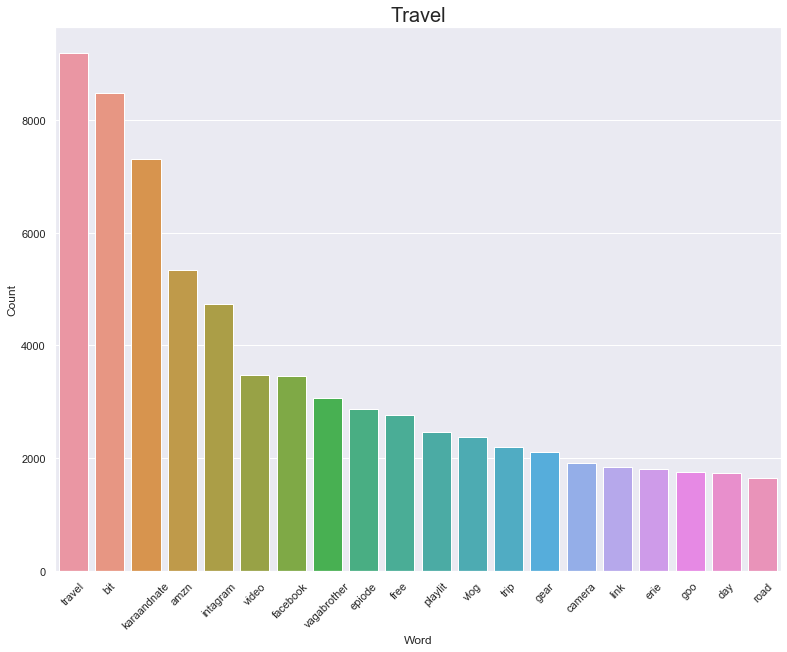

Enter any key to continue


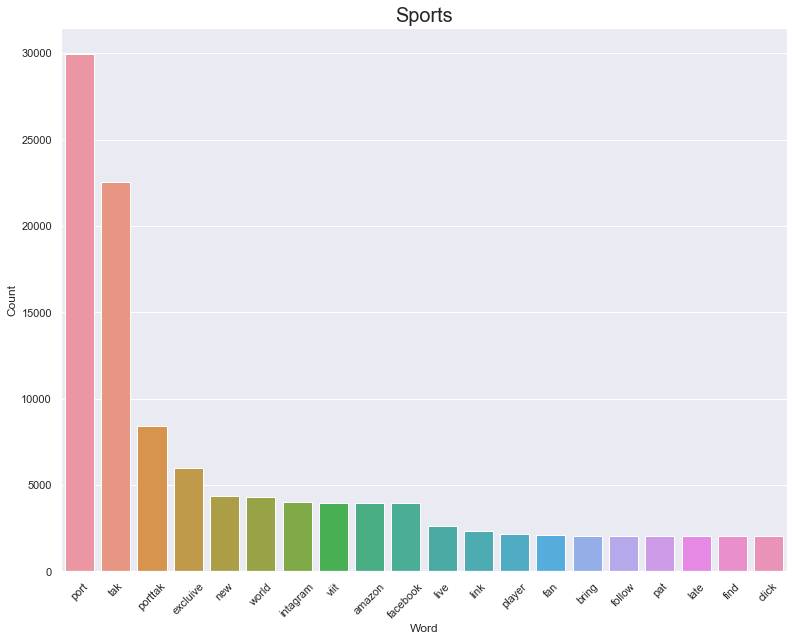

Enter any key to continue


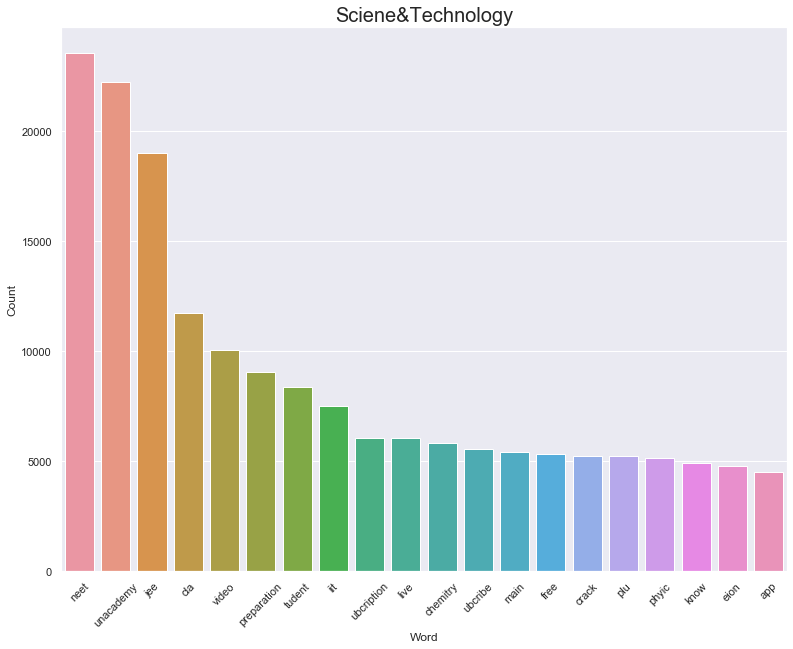

Enter any key to continue


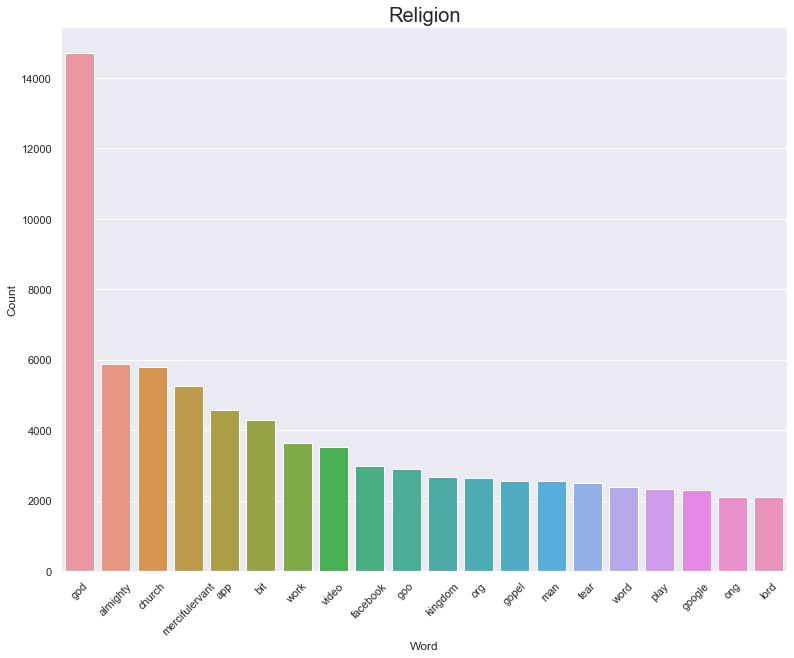

Enter any key to continue


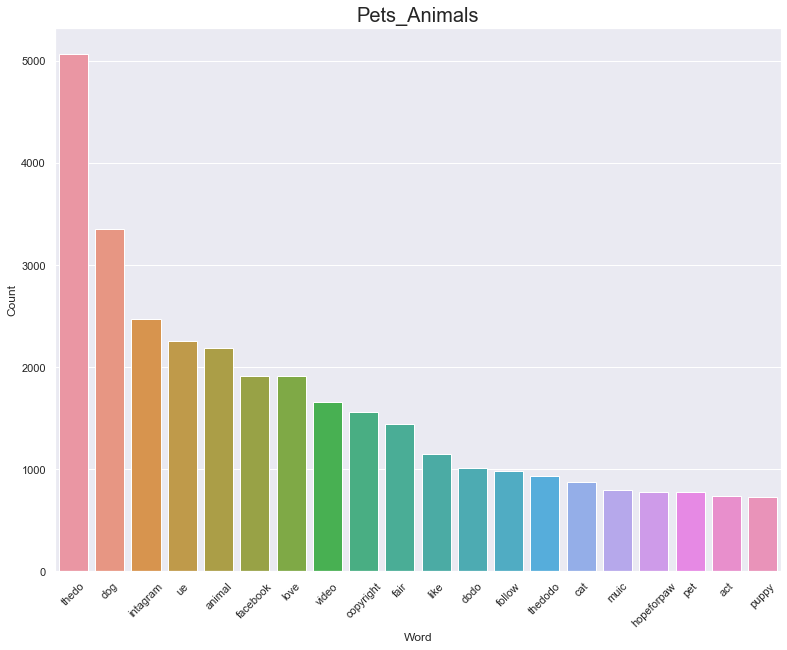

Enter any key to continue


In [5]:
for cat in categories:
    plot_unigram(tags_freq[tags_freq.Category==cat].iloc[:20], cat)
    input("Enter any key to continue")